# Suport Vector Machine: 

Las Máquinas de Vectores de Soporte (SVM, por sus siglas en inglés) son un tipo de modelo de aprendizaje automático utilizado tanto para problemas de clasificación como de regresión. La idea principal detrás de las SVM es encontrar el hiperplano óptimo que maximice la separación entre diferentes clases de datos en un espacio de características.

En la clasificación, las SVM buscan encontrar el hiperplano de separación que maximice la distancia entre los puntos de datos más cercanos de cada clase, también conocidos como vectores de soporte. Esto permite clasificar de manera efectiva nuevos puntos de datos en una o más clases.

Las SVM son especialmente útiles cuando los datos no son linealmente separables en el espacio de características original. Para abordar este escenario, las SVM utilizan transformaciones no lineales y técnicas como los "kernels" para mapear los datos a un espacio de características de mayor dimensión donde se vuelven linealmente separables.

Las SVM son conocidas por su capacidad para manejar eficientemente conjuntos de datos de alta dimensionalidad y son robustas frente a problemas de sobreajuste. Además, las SVM tienen una base teórica sólida y se benefician de algoritmos de optimización eficientes para encontrar el hiperplano óptimo.

En resumen, las SVM son una poderosa herramienta en el aprendizaje automático para la clasificación y regresión, particularmente en casos donde los datos son no linealmente separables. Su capacidad para encontrar un hiperplano óptimo y su capacidad para trabajar en espacios de características de alta dimensión las convierten en una opción popular en una variedad de aplicaciones.


<table class="tfo-notebook-buttons" align="center">

  <td>
    <a target="_blank" href="https://colab.research.google.com/github/jsebastianquiroga/analitica_ia_puj/blob/main/Analitica_2/01_SVM_ejemplo_kernels.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/jsebastianquiroga/analitica_ia_puj/blob/main/Analitica_2/01_SVM_ejemplo_kernels.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
  
</table>

Este código define la función plot_svc_decision_function que se utiliza para visualizar la función de decisión de un modelo de clasificación SVM bidimensional (SVC).

La función toma como entrada un modelo SVM entrenado (model) y un objeto de ejes (ax) opcional para especificar en qué ejes se dibujará el gráfico. Si no se proporciona un objeto de ejes, se utilizará el objeto de ejes actual.

La función comienza obteniendo los límites actuales de los ejes (xlim y ylim) para establecer los límites del gráfico resultante. Luego, crea una cuadrícula de puntos en el espacio de características utilizando los límites de los ejes.

Luego, se evalúa la función de decisión (decision_function) del modelo en cada punto de la cuadrícula y se reformatea en la forma adecuada para trazarla en el gráfico (P).

La función traza la línea de decisión y los márgenes utilizando la función contour y establece los colores y estilos adecuados. También se pueden trazar los vectores de soporte (support vectors) utilizando la función scatter si plot_support se establece en True.

Finalmente, se ajustan los límites de los ejes para que se ajusten al gráfico resultante.

In [1]:
from sklearn.datasets import make_blobs, make_circles
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import pandas as pd
import numpy as np

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC
       Source: https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html
    """
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create a grid to evaluate the model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot the decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # Plot the support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none', edgecolors='black')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)


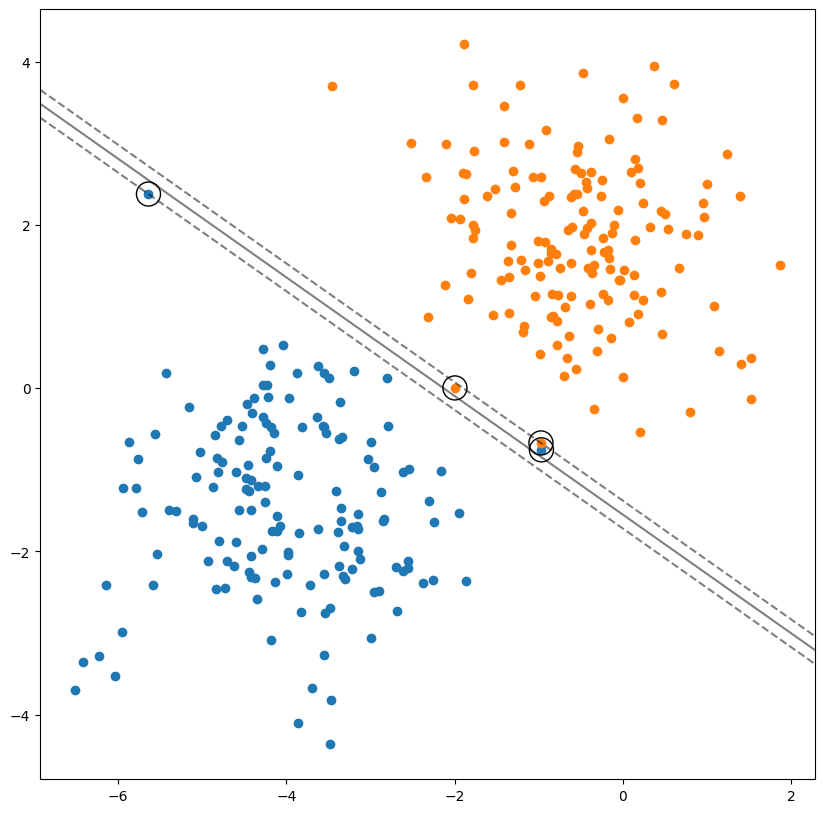

In [2]:
# Creación de un conjunto de datos sintético utilizando make_blobs
X, y = make_blobs(n_samples=300, centers=2, n_features=2, random_state=1, center_box=(-4, 4))

# Creación y ajuste del modelo SVC lineal
svc_linear = SVC(kernel='linear', C=100).fit(X, y)  # Utilizamos un valor grande de C para penalizar más los errores

# Visualización de los datos y la función de decisión del modelo
plt.figure(figsize=(10, 10))
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plot_svc_decision_function(svc_linear, plot_support=True)

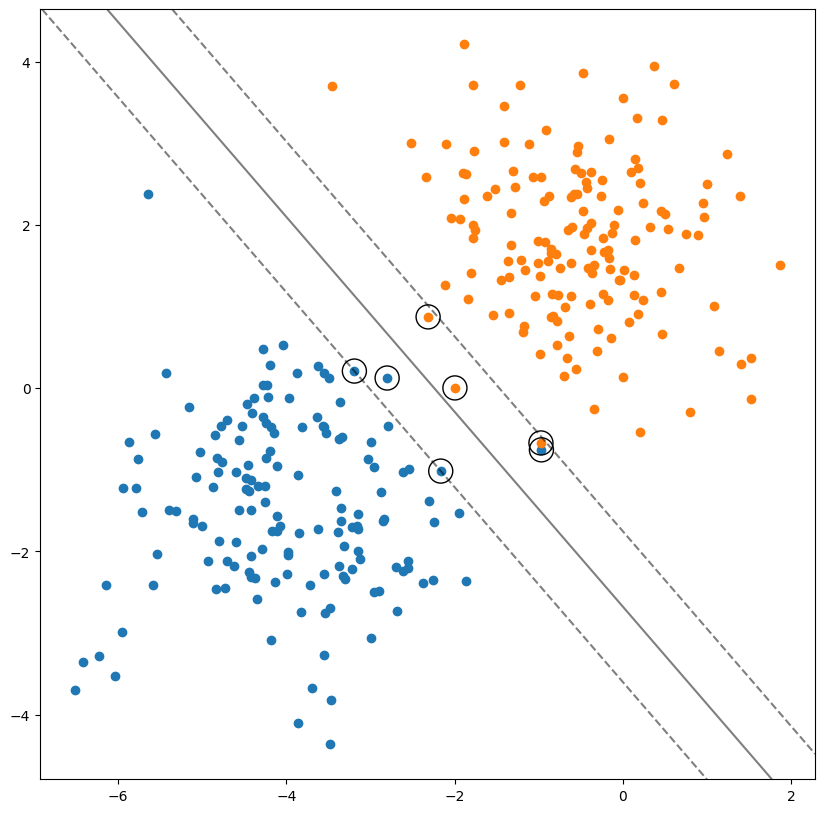

In [3]:
svc_linear_C1 = SVC(kernel='linear', C=1).fit(X, y) # Acepto equivocarme un poquito... 

plt.figure(figsize = (10, 10))
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plot_svc_decision_function(svc_linear_C1, plot_support = True)

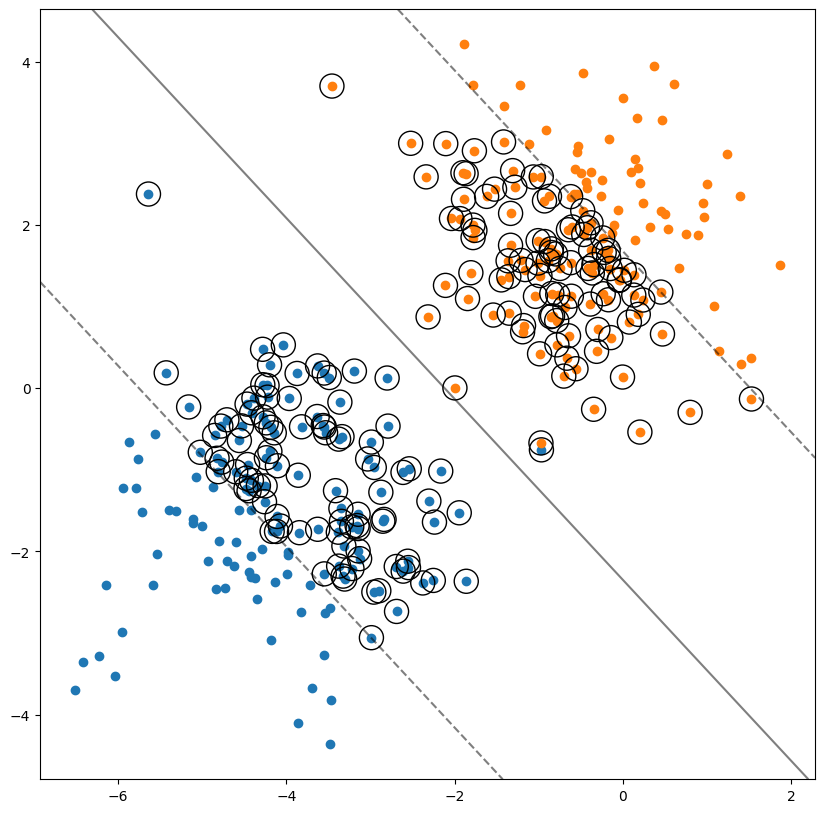

In [4]:
svc_linear_C0 = SVC(kernel='linear', C=0.001).fit(X, y) # Aquí no me importa nada equivocarme, prefiero tener mucha separación
plt.figure(figsize = (10, 10))
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plot_svc_decision_function(svc_linear_C0, plot_support = True)


# Radial Basis Function (Kernel Gaussiano)


El kernel de función de base radial (Radial Basis Function en inglés), también conocido como kernel gaussiano, es una técnica ampliamente utilizada en aprendizaje automático. Este kernel es especialmente útil en problemas de clasificación no lineales, donde los datos no se pueden separar de manera lineal en el espacio original. La idea detrás del kernel gaussiano es mapear los datos a un espacio de mayor dimensión, donde se vuelven linealmente separables. Esto se logra mediante la transformación de los datos utilizando una función de base radial, que asigna cada punto de datos a un valor basado en su proximidad a ciertos puntos de referencia.

El kernel gaussiano se basa en una función de distribución gaussiana, que tiene la propiedad de ser simétrica y con forma de campana. Al aplicar esta función a los datos, se asigna un peso a cada punto en función de su distancia a los puntos de referencia. Los puntos cercanos a los puntos de referencia tendrán un peso más alto, lo que significa que tendrán más influencia en la clasificación final. Esto permite capturar relaciones no lineales y regiones de decisión más complejas.

En resumen, el kernel gaussiano es una técnica poderosa para abordar problemas de clasificación no lineales al mapear los datos a un espacio de mayor dimensión y capturar relaciones no lineales. Al aprovechar la función de distribución gaussiana, el kernel gaussiano puede separar clases que no son linealmente separables en el espacio original. Esto lo convierte en una herramienta valiosa en el arsenal de algoritmos de aprendizaje automático.

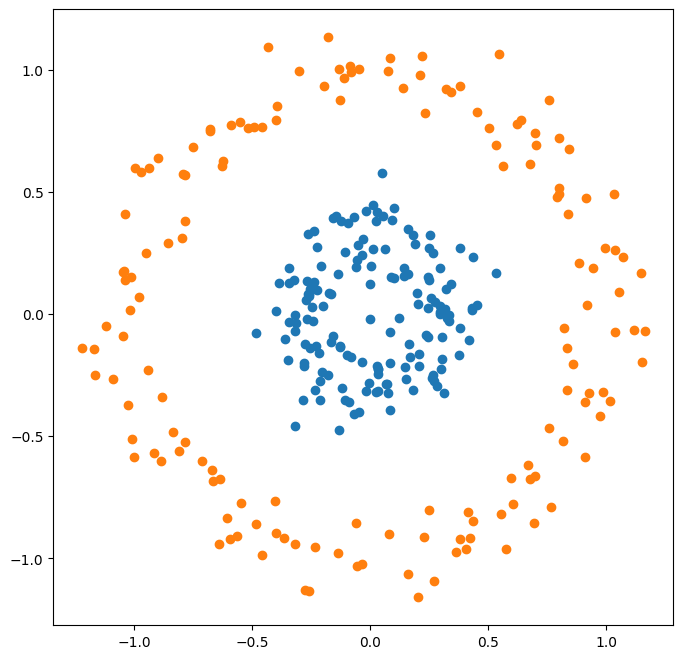

In [5]:
X, y = make_circles(n_samples=300, random_state=1, factor=0.3, noise = 0.09)

plt.figure(figsize = (8, 8))
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 0, 0], X[y == 0, 1])


svc_linear = SVC(kernel='linear', C=10000).fit(X, y) # No quiero equivocarme, C es muy grande (más sobreajuste)

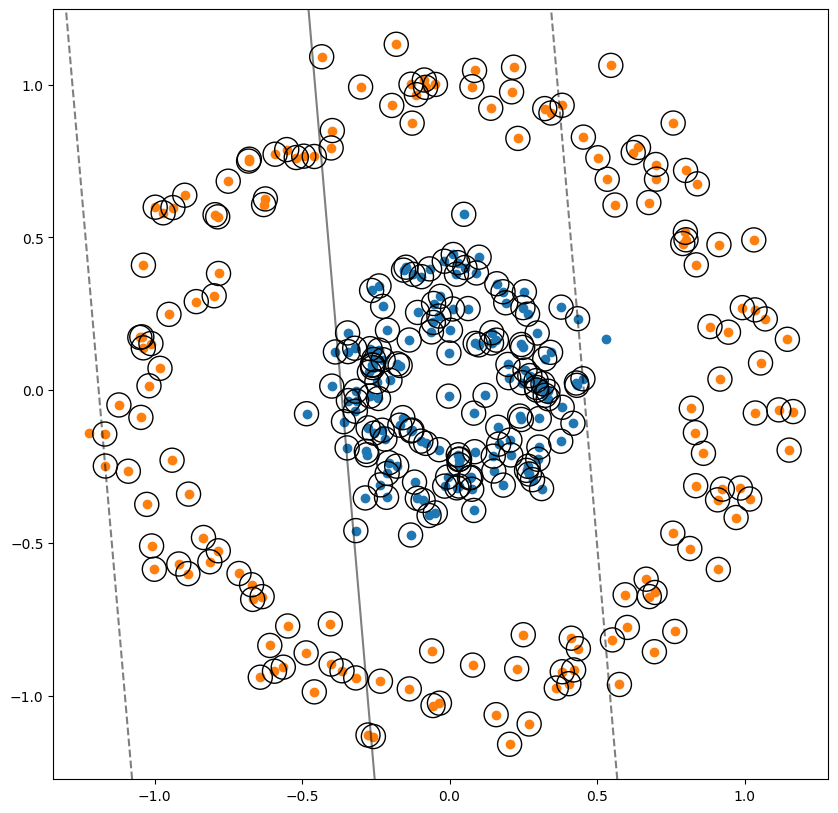

In [6]:
plt.figure(figsize = (10, 10))
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plot_svc_decision_function(svc_linear, plot_support = True)


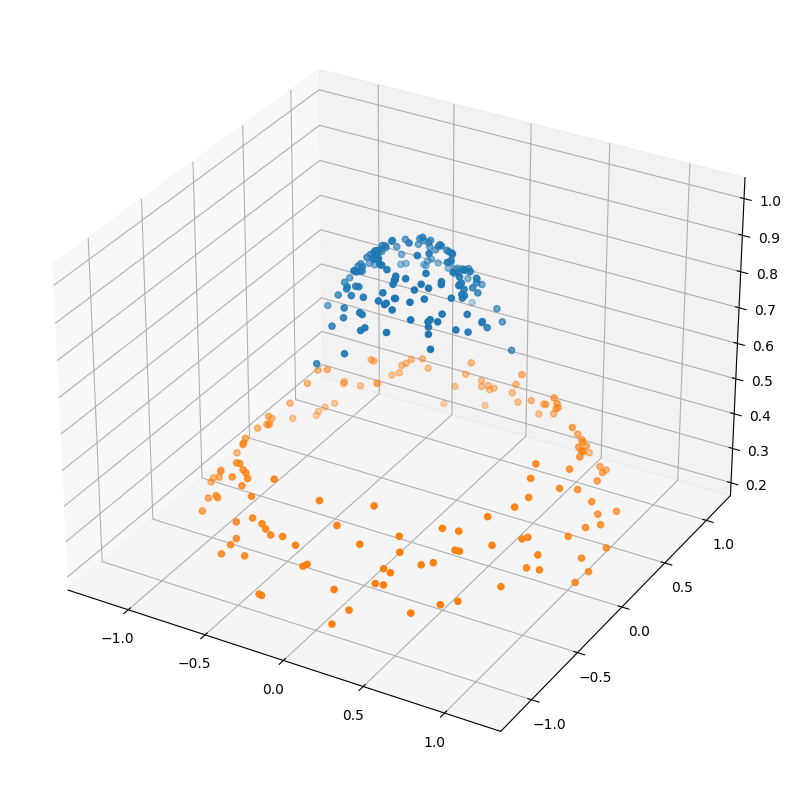

In [9]:
z = np.exp(-(X ** 2).sum(1))

fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(X[y == 1, 0], X[y == 1, 1], z[y == 1]);
ax.scatter3D(X[y == 0, 0], X[y == 0, 1], z[y == 0]);

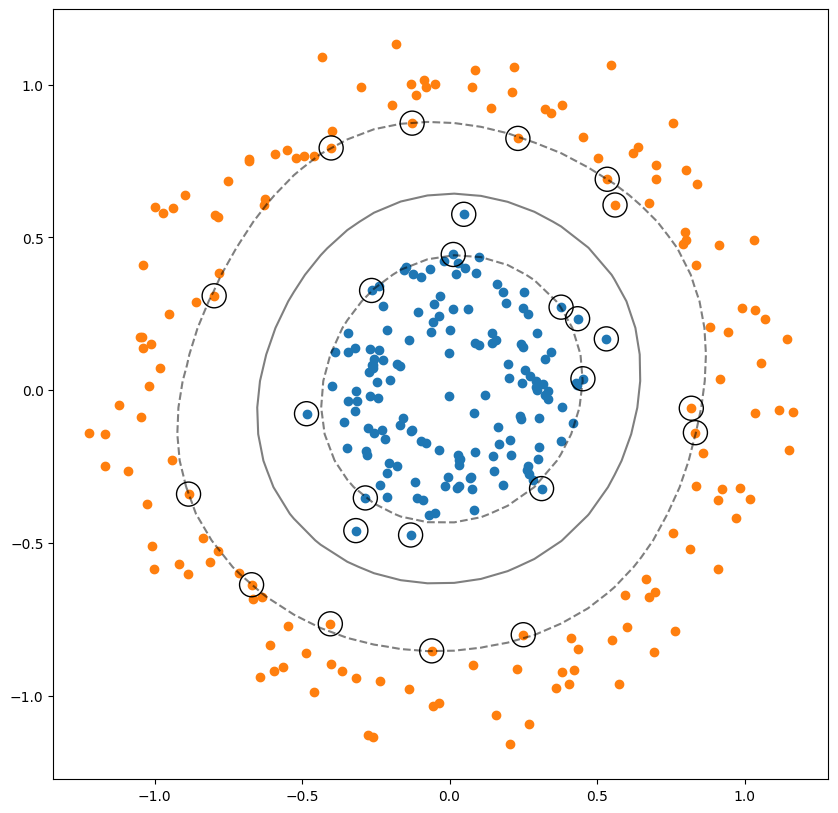

In [10]:
svc_rbf_C1 = SVC(kernel='rbf', C=1).fit(X, y) # No quiero equivocarme, C es muy grande (más sobreajuste)

plt.figure(figsize = (10, 10))
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plot_svc_decision_function(svc_rbf_C1, plot_support = True)

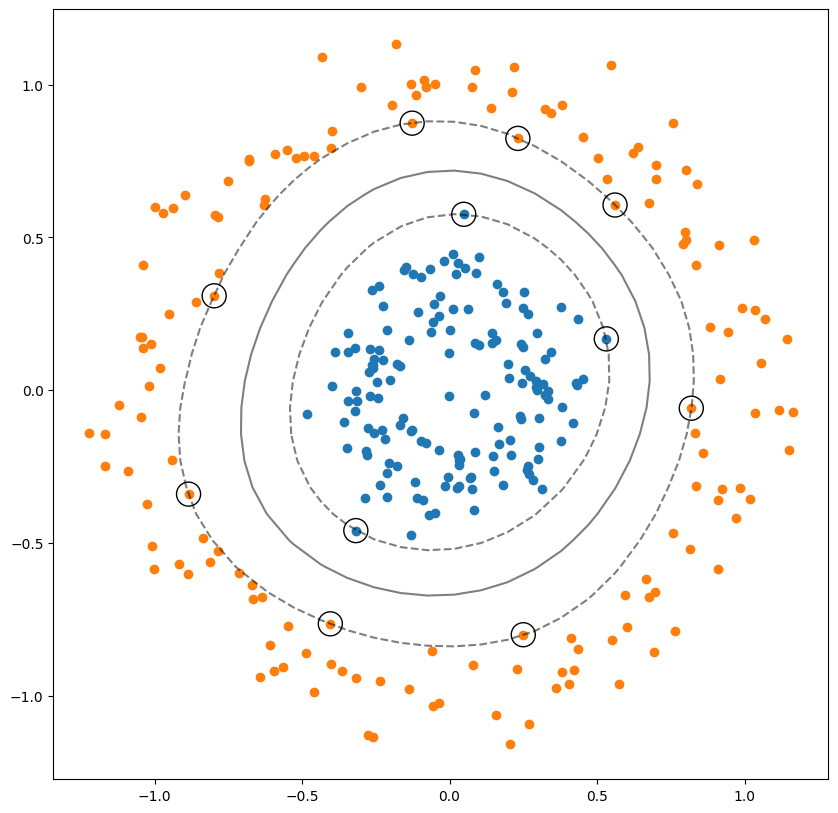

In [11]:
svc_rbf_C_Big = SVC(kernel='rbf', C=500000).fit(X, y) # No quiero equivocarme, C es muy grande (más sobreajuste)

plt.figure(figsize = (10, 10))
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plot_svc_decision_function(svc_rbf_C_Big, plot_support = True)

# Kernel RBF (Función de Base Radial)

Es uno de los kernels más utilizados en algoritmos de aprendizaje automático, como las Support Vector Machines (SVM). Este kernel permite modelar relaciones no lineales entre las variables de entrada, lo que lo convierte en una opción poderosa para problemas de clasificación y regresión más complejos.

El término "radial" se refiere a la forma en que la función se propaga desde un punto central, lo que significa que los puntos más cercanos al centro tienen un mayor impacto en la función. Esto permite capturar patrones y estructuras más complejas en los datos.

El Kernel RBF utiliza una función de base radial, también conocida como función gaussiana, para mapear los datos a un espacio de características de mayor dimensión. Esta función se define como una medida de similitud entre dos puntos en función de su distancia euclidiana. Los puntos más cercanos tendrán una similitud más alta, mientras que los puntos más alejados tendrán una similitud más baja.

Al utilizar el Kernel RBF en algoritmos como SVM, se puede lograr una mayor flexibilidad en la clasificación, ya que permite encontrar fronteras de decisión no lineales y adaptarse a la complejidad de los datos. Esto lo convierte en una herramienta valiosa para resolver problemas de aprendizaje automático con datos no lineales o separables de manera no lineal.

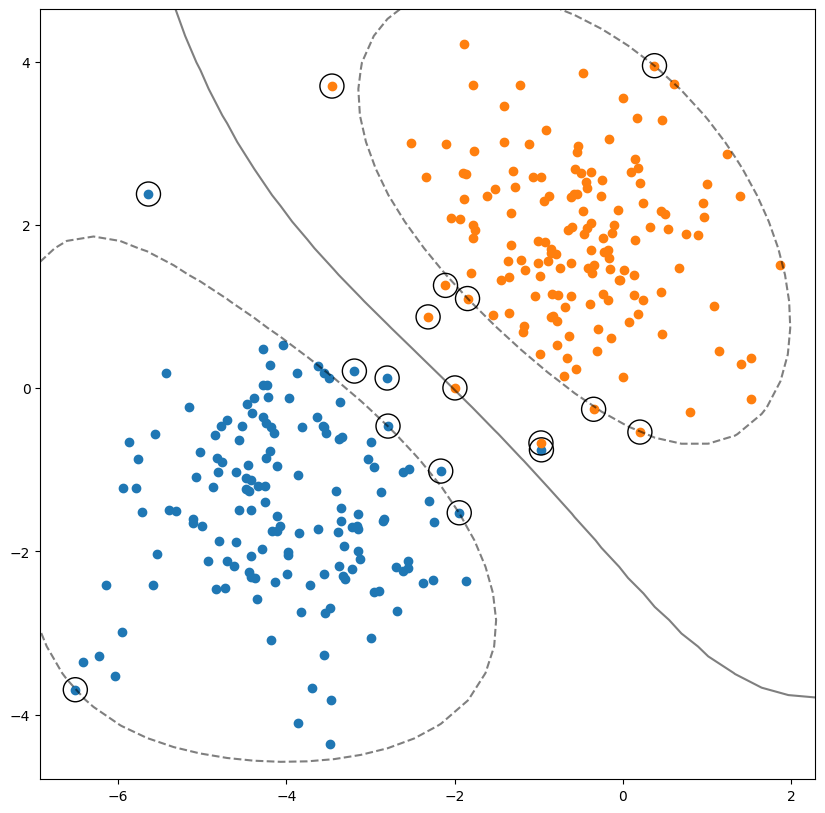

In [12]:
X, y = make_blobs(n_samples=300, centers=2, n_features=2, random_state=1, center_box = (-4, 4))

svc_rbf_C1 = SVC(kernel='rbf', C=1).fit(X, y) # No quiero equivocarme, C es muy grande (más sobreajuste)


plt.figure(figsize = (10, 10))
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plot_svc_decision_function(svc_rbf_C1, plot_support = True)